In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [8]:
import platform
import matplotlib.font_manager as fm

_os_name = platform.system()

# font_path는 사용할 폰트에 따라 변경하면 됨
_font_path = 'c:/Windows/Fonts/malgun.ttf' if _os_name=='Windows' \
    else '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
_font_family = fm.FontProperties(fname=_font_path).get_name()

# font 설정
plt.rcParams['font.family'] = _font_family

# 폰트캐시까지 삭제 후 한글폰트가 사용될 수 있도록 캐시 삭제
# --> 이렇게 해야 비로소 한글이 표현되는 경우가 많음
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [_font_family]

_fe = fm.FontEntry(
    fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, _fe)

In [3]:
_PATH_BASE = os.path.join(os.getcwd(), 'data', '33-sun-power')
_PATH_TRAIN = os.path.join(_PATH_BASE, 'pp_train.csv')

In [11]:
df_train = pd.read_csv(_PATH_TRAIN)

In [12]:
df_train.tm = pd.to_datetime(df_train.tm)

In [13]:
df_train.set_index('tm', inplace=True)

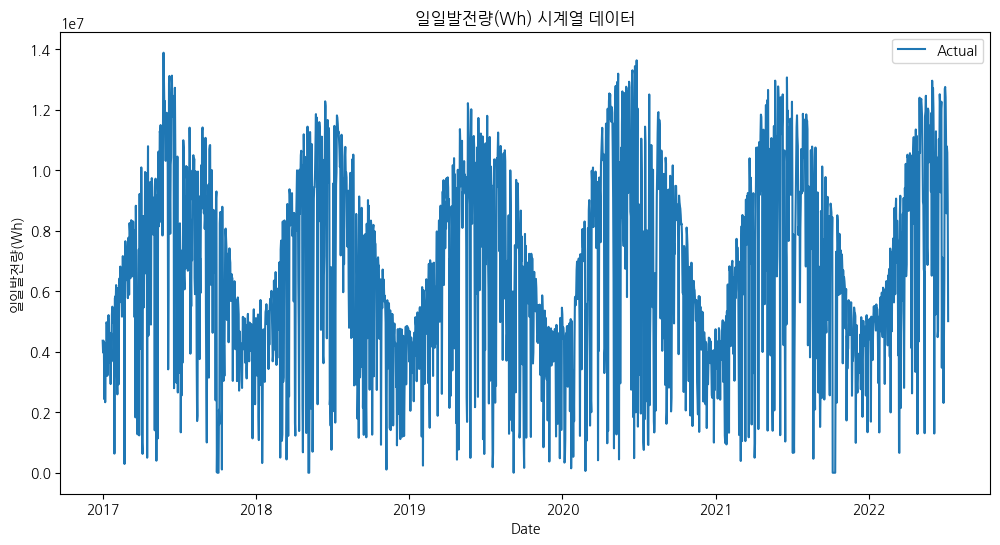

In [14]:
# 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['일일발전량(Wh)'], label='Actual')
plt.xlabel('Date')
plt.ylabel('일일발전량(Wh)')
plt.title('일일발전량(Wh) 시계열 데이터')
plt.legend()
plt.show()

In [20]:
p, d, q = 1, 1, 1  # ARIMA 모델 파라미터 설정
arima_model = ARIMA(df_train['일일발전량(Wh)'], order=(p, d, q))
arima_result = arima_model.fit()

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
P, D, Q, s = 1, 1, 1, 7
sarimax_model = SARIMAX(df_train['일일발전량(Wh)'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = sarimax_model.fit()

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63174D+01    |proj g|=  7.78377D-02

At iterate    5    f=  1.62638D+01    |proj g|=  1.54137D-02

At iterate   10    f=  1.62576D+01    |proj g|=  1.03113D-03

At iterate   15    f=  1.62576D+01    |proj g|=  2.90058D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     20      1     0     0   1.895D-05   1.626D+01
  F =   16.257553421338166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [23]:
forecast_arima = arima_result.get_forecast(steps=30)
forecast_sarimax = sarimax_result.get_forecast(steps=30)
forecast_arima.row_labels

InvalidIndexError: (slice(None, None, None), 0)

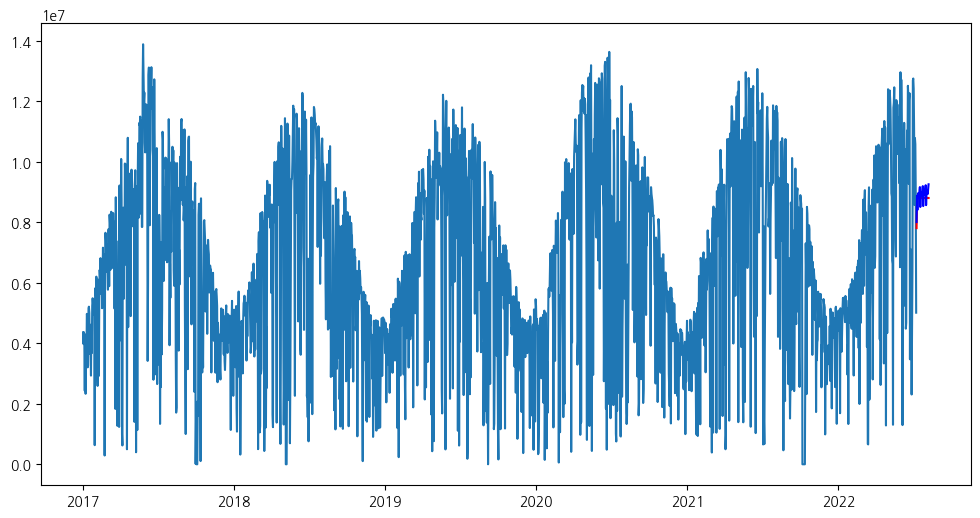

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['일일발전량(Wh)'], label='Actual')
plt.plot(forecast_arima.row_labels, forecast_arima.predicted_mean, label='ARIMA Forecast', color='red')
plt.plot(forecast_sarimax.row_labels, forecast_sarimax.predicted_mean, label='SARIMAX Forecast', color='blue')
plt.fill_between(forecast_arima.row_labels, forecast_arima.conf_int()[:, 0], forecast_arima.conf_int()[:, 1], color='r', alpha=0.2)
plt.fill_between(forecast_sarimax.row_labels, forecast_sarimax.conf_int()[:, 0], forecast_sarimax.conf_int()[:, 1], color='b', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('일일발전량(Wh)')
plt.title('ARIMA vs. SARIMAX 예측 결과')
plt.legend()
plt.show()